In [12]:
%load_ext autoreload
%autoreload 2
import json
from scipy import sparse
from scipy import stats
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1. Read the dataset with Pandas

In [2]:
dataset = pd.read_json("../data/rcv1_news.json", lines=True)
dataset.shape[0]

804414

In [3]:
print(type(dataset))
dataset

<class 'pandas.core.frame.DataFrame'>


,categories,content,date,headline,id,lang,title
0,"[E11, ECAT, M11, M12, MCAT]",Emerging evidence that Mexico's economy was ba...,1996-08-20,Recovery excitement brings Mexican markets to ...,2286,en,MEXICO: Recovery excitement brings Mexican mar...
1,"[C24, CCAT]",Chrysler Corp. Tuesday announced $380 million ...,1996-08-20,Chrysler plans new investments in Latin America.,2287,en,USA: Chrysler plans new investments in Latin A...
2,"[C15, C151, CCAT, E41, ECAT, GCAT, GJOB]",CompuServe Corp. Tuesday reported a surprising...,1996-08-20,"CompuServe reports loss, cutting work force.",2288,en,"USA: CompuServe reports loss, cutting work force."
3,"[C15, C151, CCAT]",CompuServe Corp. Tuesday reported a surprising...,1996-08-20,"CompuServe reports loss, cutting work force.",2289,en,"USA: CompuServe reports loss, cutting work force."
4,"[C11, C22, CCAT]",If dining at Planet Hollywood made you feel li...,1996-08-20,Planet Hollywood launches credit card.,2290,en,USA: Planet Hollywood launches credit card.
5,"[M14, MCAT]",Hog prices fell Tuesday after government slaug...,1996-08-20,"Hog prices tumble as supplies increase, cocoa ...",2291,en,"USA: Hog prices tumble as supplies increase, c..."
6,"[M11, M12, M13, M132, M14, MCAT]",Blue-chip stocks rallied Tuesday after the Fed...,1996-08-20,Blue chips end up as Fed keeps interest rates ...,2292,en,USA: Blue chips end up as Fed keeps interest r...
7,"[C22, CCAT]",Sprint Corp. Tuesday announced plans to offer ...,1996-08-20,Sprint to offer consumer Internet access service.,2293,en,USA: Sprint to offer consumer Internet access ...
8,"[E14, ECAT]",Shoppers are loading up this year on perennial...,1996-08-20,Back-to-school spending is up.,2294,en,USA: Back-to-school spending is up.
9,"[C12, CCAT, GCAT, GCRIM]",Kansas and Arizona filed lawsuits against some...,1996-08-20,"Kansas, Arizona add to suits against tobacco f...",2295,en,"USA: Kansas, Arizona add to suits against toba..."


# 2. Tokeninzing, computing IDF and TFIDF term-document matrix

In [ ]:
#tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

tfidf_vectorizer = TfidfVectorizer(min_df=2, norm=None, stop_words='english') 
t0 = time()
rcv1_features_idf = tfidf_vectorizer.fit(dataset["content"])
print("FIT done in %0.3fs." % (time() - t0))

In [ ]:
rcv1_tfidf_matrix = tfidf_vectorizer.transform(dataset["content"])
print("FIT-TRANSFORM done in %0.3fs." % (time() - t0))

In [ ]:
idf_vectorizer = TfidfVectorizer(min_df=2, binary=True, norm=None, stop_words='english')
t0 = time()
rcv1_idf_matrix = idf_vectorizer.fit_transform(dataset["content"])
print("FIT-TRANSFORM done in %0.3fs." % (time() - t0))

In [ ]:
%store rcv1_features_idf
%store rcv1_tfidf_matrix
%store rcv1_idf_matrix

# 3. Terms and IDF

In [ ]:
print("Number of terms in dictionary:", len(rcv1_features_idf.idf_))
print()

top10IDFTerm_idx = rcv1_features_idf.idf_.argsort()[::-1][:100]
print(top10IDFTerm_idx)
print(rcv1_features_idf.idf_[top10IDFTerm_idx])

In [ ]:
inv_vocab = {v: k for k, v in rcv1_features_idf.vocabulary_.items()}
for term_id in top10IDFTerm_idx[:10]:
    print(inv_vocab[term_id], rcv1_features_idf.idf_[term_id])

In [ ]:
plt.plot(sorted(rcv1_features_idf.idf_, reverse=True))
plt.show()

# 4. Top 10 IDF terms and their TFIDF

In [ ]:
for i in range(rcv1_idf_matrix.shape[0]):
    if i==10:
        break
#     print(dataset["title"].iloc[i])
#     print(dataset["content"].iloc[i])
    idf_row = rcv1_idf_matrix.getrow(i) # this is a 1 x 659255 csr matrix
    tfidf_row = rcv1_tfidf_matrix.getrow(i) # this is a 1 x 659255 csr matrix
    top10Terms_tfidf_idx = tfidf_row.data.argsort()[::-1][:10] # index of top 10 terms in the small array with nonzeros 
    top10Terms_idf_idx = idf_row.data.argsort()[::-1][:10]
    
#     print(row.data) # give only nonzero values so the array is much less than 659255, e.g. 30
#     print(row.indices) # gives the actual indices of the non zero terms
    
    print("-----------------")
    print("Document: ",i)
    print()
    
    print("Top 10 Highest IDF")
    print(top10Terms_idf_idx)
    print([inv_vocab[term_id] for term_id in idf_row.indices[top10Terms_idf_idx]])
    print(idf_row.indices[top10Terms_idf_idx])
    print("IDF values: ",idf_row.data[top10Terms_idf_idx])
    print("TFIDF values: ", tfidf_row.data[top10Terms_idf_idx])
    print()
    
    print("Top 10 Highest TFIDF")
    print(top10Terms_tfidf_idx)
    print([inv_vocab[term_id] for term_id in tfidf_row.indices[top10Terms_tfidf_idx]])
    print(tfidf_row.indices[top10Terms_tfidf_idx])
    print("TFIDF values: ", tfidf_row.data[top10Terms_tfidf_idx])
    print("IDF values: ", idf_row.data[top10Terms_tfidf_idx])
    print()

# 5. Position of High terms in Docs

In [ ]:
# do some regression to find alpha for each (buckets with freqs?)

# as described here: https://www.nltk.org/_modules/nltk/tokenize.html
# the default analyzer used in scikit is called "word": 
# https://towardsdatascience.com/hacking-scikit-learns-vectorizers-9ef26a7170af

def find_positions_term(term, token_text):
    pos = [k for k,v in enumerate(token_text) if v==term]
    return pos

def find_positions_termlist(terms, token_text):
    term_set = set(terms)
    pos = [k for k,v in enumerate(token_text) if v in term_set]
    return pos

In [ ]:
analyzer = tfidf_vectorizer.build_analyzer()

In [ ]:
def getDistributionForRows(row_idxs, matrix, dataset, num_passage=10, n_terms=5):
    cum_sum = np.zeros(num_passage)
    #for i in progress_bar.iter_progress(row_idxs):
    for i in row_idxs:

        row = matrix.getrow(i) # this is a 1 x 659255 csr matrix
        top10Terms_idx = row.data.argsort()[::-1][:10]

        # find the positions of high idf/tfidf terms in the text
        top_10_terms = [inv_vocab[term_id] for term_id in row.indices[top10Terms_idx]]

        # inside the document
        all_text = dataset["content"].iloc[i]
        token_text = analyzer(all_text.lower())

        all_pos = find_positions_termlist(top_10_terms[:n_terms], token_text)
        all_pos.append(len(token_text))
        n,_ = np.histogram(all_pos, bins=num_passage, density=False, weights=np.ones(len(all_pos)) / len(all_pos))
        cum_sum += n

    return cum_sum/len(row_idxs) 

## 5.1. IDF

In [ ]:
# Default: 10 passages
# Number of terms to be considered: 5 
getDistributionForRows(range(rcv1_idf_matrix.shape[0]), rcv1_idf_matrix, dataset)

In [ ]:
# Default: 10 passages
# Number of terms to be considered: 10 
getDistributionForRows(range(rcv1_idf_matrix.shape[0]), rcv1_idf_matrix, dataset, n_terms=10)

In [ ]:
# for num_passage in [2,4,8,16]:
#     distrib = getDistributionForRows(range(idf_matrix.shape[0]), idf_matrix, dataset, num_passage)
#     print("Num passage", num_passage)
#     print(distrib)

## 5.2. TFDIF

In [ ]:
# 10 passages on top 5 terms in the text
getDistributionForRows(range(rcv1_tfidf_matrix.shape[0]), rcv1_tfidf_matrix, dataset)

In [ ]:
# 10 passages on top 10 terms in the text
getDistributionForRows(range(rcv1_tfidf_matrix.shape[0]), rcv1_tfidf_matrix, dataset, n_terms=10)

In [ ]:
# for num_passage in [2,4,8,16]:
#     distrib = getDistributionForRows(range(tfidf_matrix.shape[0]), tfidf_matrix, dataset, num_passage)
#     print("Num passage", num_passage)
#     print(distrib)

In [42]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

ind = [x+0.5 for x in range(0,11)]
vals = [x+1 for x in range(0,10)]


def plotSteps(style):
    plt.style.use(style)
    histogram=plt.figure()
    
     # we add the first element twice to make x,y match
    top10_idf = [0.15256239, 0.15256239, 0.08136048,  0.08318601,  0.08308861,  0.08364388, 0.08769106,  0.0868691 ,  0.0861667 ,  0.08896842,  0.16646338]
    top10_tfidf = [0.12844531, 0.12844531, 0.09460034,  0.0958751 ,  0.09531166,  0.09521976, 0.09909622,  0.09792716,  0.09558531,  0.09201993,  0.10591922]

    top5_idf = [0.2135277 , 0.2135277 , 0.07162818,  0.07162043,  0.06978601,  0.06970121, 0.07271478,  0.07157112,  0.07120547,  0.07394855,  0.21429655]
    top5_tfidf = [0.14760748, 0.14760748, 0.09112983,  0.09290554,  0.09188348,  0.09159916, 0.09498307,  0.09356301,  0.09078116,  0.08594075,  0.11960652]

    plt.step(range(0,11),top10_idf, label="Top 10 IDF", linewidth=2.0)
    plt.step(range(0,11),top10_tfidf, label="Top 10 TFIDF", linewidth=2.0)
    plt.step(range(0,11),top5_idf, label="Top 5 IDF", linewidth=2.0)
    plt.step(range(0,11),top5_tfidf, label="Top 5 TFIDF", linewidth=2.0)
    plt.xticks(ind, vals)
#     plt.title("Distribution of important terms in the documents")
    plt.xlabel("Passage ID")
    plt.ylabel("Probability")
    plt.legend(loc="best")
    x1,x2,y1,y2 = plt.axis()
    plt.axis([x1,x2,0.06,y2])
    plt.savefig("probabDistribRCV1.pdf", bbox_inches='tight') # pad_inches=0
    #plt.grid(False)
    plt.show()

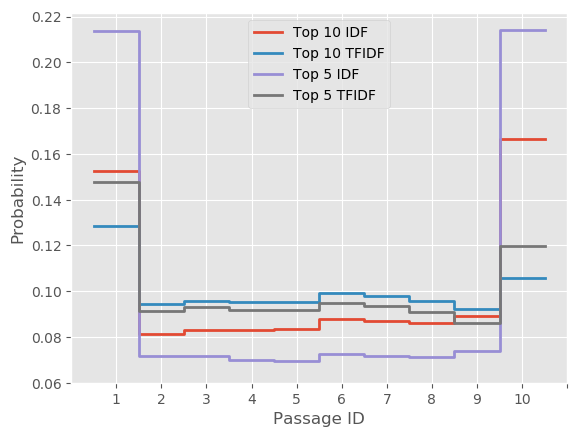

In [43]:
for style in ["ggplot"]:
    plotSteps(style)

# 6. Distribution, mean, variance for title and content

In [57]:
# load stopwords
stopwords = []
with open("/home/muntean//terrier-core-4.2/share/stopword-list.txt") as f:
    for line in f:
        stopwords.append(line.replace("\n",""))
# print(stopwords)

## 6.1. Documents 

In [58]:
doc_len = []

for i in range(dataset.shape[0]):
    # inside the document
    all_text = dataset["content"].iloc[i]
#     token_text = analyzer(all_text.lower())
    token_text = [x for x in all_text.lower().split() if x not in stopwords]
    token_text_split = all_text.split()
    doc_len.append(((len(token_text)), len(token_text_split)))

In [59]:
from scipy import stats

x = [x for x,y in doc_len]
y = [y for x,y in doc_len]
print(stats.describe(x))
print(np.std(x))

print(stats.describe(y))

DescribeResult(nobs=804414, minmax=(1, 6948), mean=147.38122906861392, variance=20910.947043380012, skewness=10.786661758460042, kurtosis=280.3074307913208)
144.6060892498135
DescribeResult(nobs=804414, minmax=(1, 8119), mean=229.91369245189665, variance=43552.01282292287, skewness=5.615614624642727, kurtosis=109.19343340200977)


DescribeResult(nobs=804414, minmax=(1, 6948), mean=147.38122906861392, variance=20910.947043380012, skewness=10.786661758460042, kurtosis=280.3074307913208)

144.6060892498135



DescribeResult(nobs=804414, minmax=(1, 8119), mean=229.91369245189665, variance=43552.01282292287, skewness=5.615614624642727, kurtosis=109.19343340200977)

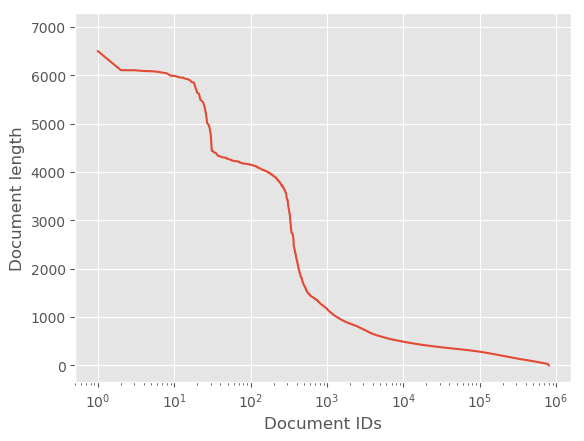

In [44]:
plt.semilogx(sorted(x, reverse=True))
# plt.title("Doc len distribution - Without stopwords")
plt.xlabel("Document IDs")
plt.ylabel("Document length")
plt.savefig("doc_len_distrib_RCV1.pdf", bbox_inches='tight')
plt.show()

# plt.semilogx(sorted(y, reverse=True))
# # plt.title("Doc len distribution -  With stopwords")
# plt.xlabel("Doc ids")
# plt.ylabel("Length")
# plt.show()

## 6.2. Titles

In [9]:
newTitle = dataset.headline.str.replace('[^a-zA-Z ]', '')

In [61]:
title_len = []
for i in range(newTitle.shape[0]):
    # inside the document
    all_text = newTitle.iloc[i]
#     token_text = analyzer(all_text.lower()) # analyzer removes all token with df = 1
    token_text = [x for x in all_text.split() if x not in stopwords]
    token_text_split = all_text.split()
    title_len.append((len(token_text), len(token_text_split)))

In [62]:
x = [x for x,y in title_len]
y = [y for x,y in title_len]
print(stats.describe(x))
print(np.std(x))
print(stats.describe(y))

DescribeResult(nobs=804414, minmax=(0, 18), mean=5.772922897910777, variance=1.439548078193632, skewness=0.015380158323674242, kurtosis=0.383206809227286)
1.1998109387034435
DescribeResult(nobs=804414, minmax=(0, 19), mean=6.593909355133054, variance=2.134074660024811, skewness=-0.19773687404291884, kurtosis=-0.011098428500478263)


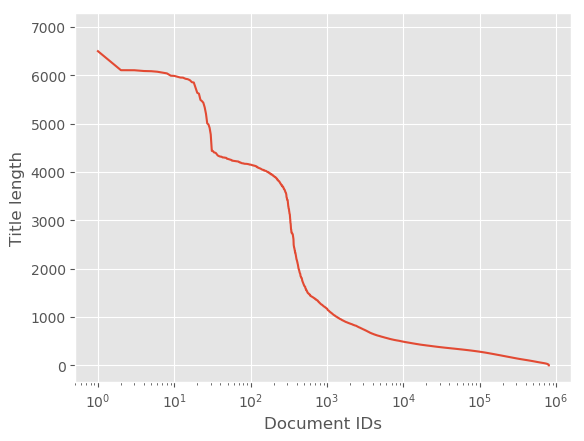

In [45]:
plt.style.use("ggplot")
plt.semilogx(sorted(x, reverse=True))
# plt.title("Doc len distribution - Without stopwords")
plt.xlabel("Document IDs")
plt.ylabel("Title length")
plt.savefig("title_len_distrib_RCV1.pdf", bbox_inches='tight')
plt.show()

# plt.semilogx(sorted(y, reverse=True))
# plt.title("Doc len distribution -  With stopwords")
# plt.xlabel("Doc ids")
# plt.ylabel("Length")
# plt.show()

# 7. Computing hardness 

In [16]:
# query_hardness_dict = dict()
# for i in range(dataset.shape[0]):
#     # inside the document
#     content = dataset["content"].iloc[i]
#     token_content = [x for x in content.lower().split() if x not in stopwords]
#     # title
#     title = newTitle.iloc[i]
#     token_title = [x for x in title.lower().split() if x not in stopwords]
    
#     query_hardness_dict[i] = float(len(token_title)) / len(token_content)

In [17]:
query_hardness_dict[3]

0.02

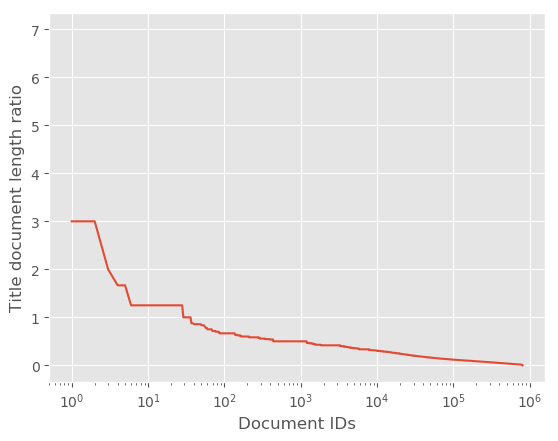

DescribeResult(nobs=804414, minmax=(0.0, 7.0), mean=0.06684399911527746, variance=0.003832868838186977, skewness=5.031039543919468, kurtosis=226.17145121065772)


In [46]:
plt.semilogx(sorted(list(query_hardness_dict.values()), reverse=True))
plt.xlabel("Document IDs")
plt.ylabel("Title document length ratio")
plt.savefig("title_doc_len_ratio_RCV1.pdf", bbox_inches='tight')
plt.show()

print(stats.describe(list(query_hardness_dict.values())))

In [21]:
%store query_hardness_dict

Stored 'query_hardness_dict' (dict)
